In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Final_Dataset (1).csv')
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,rating,sku_name,base_price,cogs,category,registered_date,payment_id,payment_method
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100.0,200.0,5220000.0,2610000.00,2610000.00,1.0,1.0,0.0,5.0,RB_Dettol Germ Busting Kit-bf,26100.0,18270.0,Others,2021-07-07,NaN,NaN
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942.0,5.0,9859710.0,2464927.50,7394782.50,1.0,0.0,0.0,5.0,PS4_Slim-500GB,1971942.0,1321182.0,Entertainment,2021-11-20,NaN,NaN
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000.0,1.0,7482000.0,2065344.62,5416655.38,1.0,0.0,0.0,4.0,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580.0,Entertainment,2021-11-19,NaN,NaN
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680.0,1.0,3593680.0,1455440.40,2138239.60,1.0,1.0,1.0,5.0,dawlance_Inverter 30,3593680.0,3054628.0,Appliances,2021-11-03,1.0,cod
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220.0,1.0,4413220.0,1059172.80,3354047.20,1.0,1.0,1.0,4.0,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472.0,Appliances,2021-07-05,1.0,cod


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5857 entries, 0 to 5856
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5857 non-null   object 
 1   customer_id      5857 non-null   object 
 2   order_date       5857 non-null   object 
 3   sku_id           5857 non-null   object 
 4   price            5857 non-null   float64
 5   qty_ordered      5857 non-null   float64
 6   before_discount  5857 non-null   float64
 7   discount_amount  5857 non-null   float64
 8   after_discount   5857 non-null   float64
 9   is_gross         5857 non-null   float64
 10  is_valid         5857 non-null   float64
 11  is_net           5857 non-null   float64
 12  rating           5857 non-null   float64
 13  sku_name         5857 non-null   object 
 14  base_price       5857 non-null   float64
 15  cogs             5857 non-null   float64
 16  category         5857 non-null   object 
 17  registered_dat

In [ ]:
df.describe()

,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,rating,base_price,cogs,payment_id
count,5.857000e+03,5857.000000,5.857000e+03,5.857000e+03,5.857000e+03,5857.0,5857.000000,5857.000000,5857.000000,5.857000e+03,5.857000e+03,2431.0
mean,1.050156e+06,2.309544,1.464821e+06,5.674375e+03,1.459147e+06,1.0,0.683626,0.415059,2.421376,1.043108e+06,7.820784e+05,1.0
std,1.922302e+06,19.873773,1.004024e+07,6.835872e+04,1.003897e+07,0.0,0.465100,0.492774,2.453044,1.917683e+06,1.422921e+06,0.0
min,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.0
25%,6.269800e+04,1.000000,9.274200e+04,0.000000e+00,9.251000e+04,1.0,0.000000,0.000000,1.000000,6.322000e+04,4.732800e+04,1.0
50%,2.029420e+05,1.000000,2.436000e+05,0.000000e+00,2.436000e+05,1.0,1.000000,0.000000,1.000000,1.971420e+05,1.461020e+05,1.0
75%,9.802000e+05,1.000000,1.189000e+06,0.000000e+00,1.183200e+06,1.0,1.000000,1.000000,4.000000,9.796200e+05,7.077740e+05,1.0
max,2.778200e+07,1000.000000,5.187520e+08,2.610000e+06,5.187520e+08,1.0,1.000000,1.000000,16.000000,2.778200e+07,1.694702e+07,1.0


In [ ]:
df.columns

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'rating', 'sku_name', 'base_price', 'cogs',
       'category', 'registered_date', 'payment_id', 'payment_method'],
      dtype='object')

In [ ]:
df.size

117140

In [ ]:
df.shape

(5857, 20)

In [ ]:
df.isnull().sum()

,0
id,0
customer_id,0
order_date,0
sku_id,0
price,0
qty_ordered,0
before_discount,0
discount_amount,0
after_discount,0
is_gross,0


In [ ]:
data_2022 = df[(df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31')]
data_2022['order_date'] = pd.to_datetime(data_2022['order_date'])

monthly_sales = data_2022.groupby(data_2022['order_date'].dt.to_period('M')).agg({'qty_ordered': 'sum'}).reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

print(monthly_sales)

   order_date  qty_ordered
0  2022-01-01        776.0
1  2022-02-01        622.0
2  2022-03-01        841.0
3  2022-04-01       1132.0
4  2022-05-01        659.0
5  2022-06-01        743.0
6  2022-07-01        580.0
7  2022-08-01       1231.0
8  2022-09-01       1175.0
9  2022-10-01        159.0
10 2022-11-01        183.0
11 2022-12-01        159.0


<ipython-input-11-e51539a2f5c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['order_date'] = pd.to_datetime(data_2022['order_date'])


In [ ]:
monthly_sales['month_number'] = np.arange(len(monthly_sales))

X = monthly_sales[['month_number']]
y = monthly_sales['qty_ordered']


In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Evaluate on historical data
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Mean Absolut Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolut Error (MAE): 262.62043512043516
Root Mean Squared Error (RMSE): 324.6354646772052


In [ ]:
# Create DataFrame for future months (Q2 2023: April, May, June)
future_months = pd.DataFrame({'month_number': [15, 16, 17]})
future_sales = model.predict(future_months)
future_months['predicted_sales'] = future_sales

print("Predicted Sales for Q2 2023:")
print(future_months)

Predicted Sales for Q2 2023:
   month_number  predicted_sales
0            15       231.801865
1            16       183.745921
2            17       135.689977


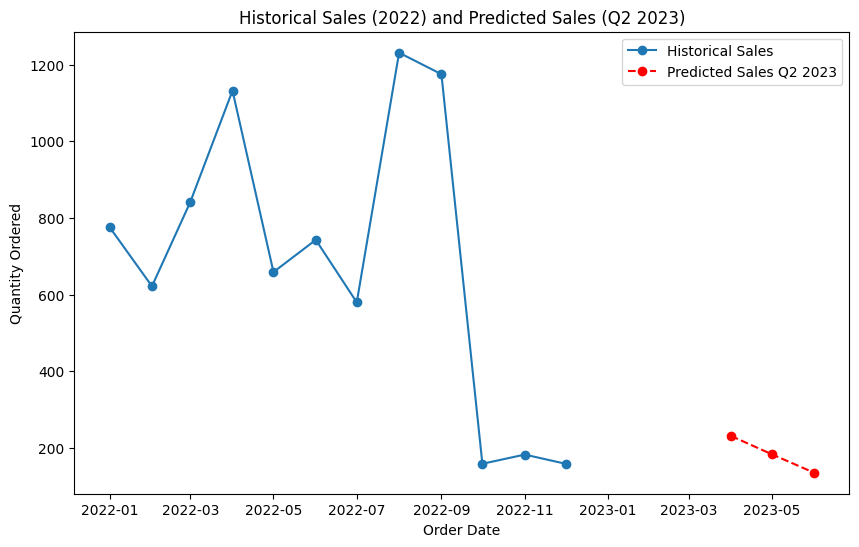

In [ ]:
# Plot historical data
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['order_date'], y, marker='o', label='Historical Sales')

# Create date range for Q2 2023 predictions
future_dates = pd.date_range(start='2023-04-01', periods=3, freq='MS')
plt.plot(future_dates, future_sales, marker='o', linestyle='--', color='red', label='Predicted Sales Q2 2023')

plt.xlabel("Order Date")
plt.ylabel("Quantity Ordered")
plt.title("Historical Sales (2022) and Predicted Sales (Q2 2023)")
plt.legend()
plt.show()

In [ ]:
future_months['order_date'] = future_dates  # Add the corresponding dates
future_months.to_csv("predicted_sales_q2_2023.csv", index=False)

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])  # Convert 'order_date' to datetime
df['Month'] = df['order_date'].dt.to_period('M')

In [ ]:
df['Month'] = df['order_date'].dt.to_period('M')

monthly_data = df.groupby("Month").agg(
    total_sales=('qty_ordered', 'sum'),
    total_before_discount=('before_discount', 'sum'),
    total_discount=('discount_amount', 'sum')
).reset_index()

monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()

monthly_data = monthly_data.sort_values("Month")

monthly_data['sales_growth'] = monthly_data['total_sales'].pct_change() * 100

monthly_data['discount_rate'] = (monthly_data['total_discount'] / monthly_data['total_before_discount']) * 100

print(monthly_data)

        Month  total_sales  total_before_discount  total_discount  \
0  2021-01-01        232.0           1.184704e+08       613932.90   
1  2021-02-01        200.0           1.141362e+08            0.00   
2  2021-03-01        283.0           1.749214e+08        11600.00   
3  2021-04-01        123.0           8.104170e+07        29000.00   
4  2021-05-01        203.0           1.069228e+08        82922.60   
5  2021-06-01        203.0           1.103925e+08        58000.00   
6  2021-07-01        528.0           4.891773e+08        98066.40   
7  2021-08-01        538.0           4.380238e+08        58000.00   
8  2021-09-01        672.0           4.576682e+08       664790.20   
9  2021-10-01        756.0           4.818003e+08        29000.00   
10 2021-11-01        974.0           5.011960e+08     15595620.58   
11 2021-12-01        555.0           4.232897e+08         5800.00   
12 2022-01-01        776.0           4.354494e+08       424641.78   
13 2022-02-01        622.0        

In [ ]:
monthly_data.to_csv("monthly_sales_metrics.csv", index=False)